In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 5/
%ls

/content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 5
Logistic_Regression.ipynb  proteins_training_set.csv
proteins_test_set.csv      proteins_validation_set.csv


## **Importar la librerias y carga de datos**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from google.colab import files
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [15]:
# Carga los archivos CSV (debes haberlos subido antes)
train_data = pd.read_csv('proteins_training_set.csv')
val_data = pd.read_csv('proteins_validation_set.csv')
test_data = pd.read_csv('proteins_test_set.csv')

# Mostrar las primeras filas de los datos de entrenamiento
train_data.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,1065,1076,0.994,1.790,1.010,2.367,5.562073,0.117928,-0.045020,32.418821,1
1,380,392,1.065,0.209,1.024,0.885,5.718933,0.071295,-0.190056,34.849362,1
2,11,18,0.950,1.080,1.048,1.950,4.348450,0.152672,-0.311450,35.357634,1
3,105,119,0.836,0.028,1.083,-0.827,11.713196,0.064286,-0.622857,79.027143,1
4,172,186,1.014,0.185,1.044,1.960,4.749329,0.036269,0.309326,30.149741,1


## **Revisión de los datos**

In [17]:
print("Forma del conjunto de entrenamiento:", train_data.shape)
print("Forma del conjunto de validación:", val_data.shape)
print("Forma del conjunto de prueba:", test_data.shape)

print("\nInformación del conjunto de entrenamiento:")
print(train_data.info())

print("\nValores faltantes en el conjunto de entrenamiento:")
print(train_data.isnull().sum())

Forma del conjunto de entrenamiento: (9204, 11)
Forma del conjunto de validación: (2303, 11)
Forma del conjunto de prueba: (2878, 11)

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_position       9204 non-null   int64  
 1   end_position         9204 non-null   int64  
 2   chou_fasman          9204 non-null   float64
 3   emini                9204 non-null   float64
 4   kolaskar_tongaonkar  9204 non-null   float64
 5   parker               9204 non-null   float64
 6   isoelectric_point    9204 non-null   float64
 7   aromaticity          9204 non-null   float64
 8   hydrophobicity       9204 non-null   float64
 9   stability            9204 non-null   float64
 10  target               9204 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 791.1 KB
None

Valores

## **Inspección de la frecuencia de cada clase**


Distribución de clases en el conjunto de entrenamiento:
target
0    0.728922
1    0.271078
Name: proportion, dtype: float64


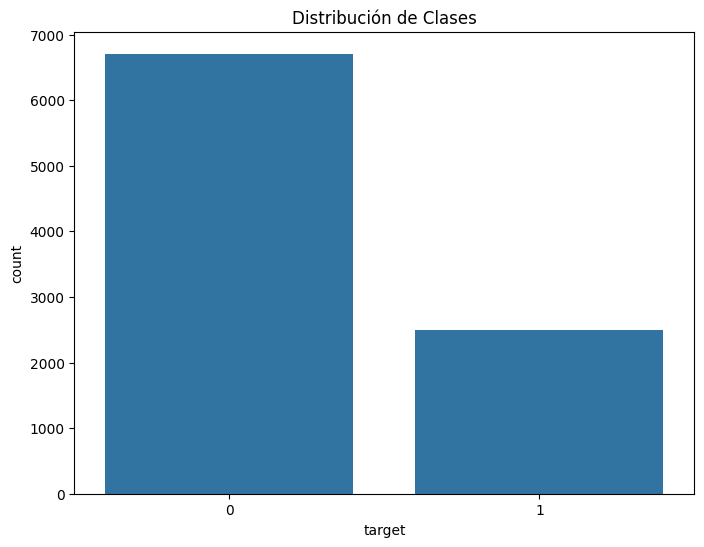

In [18]:
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(train_data['target'].value_counts(normalize=True))

# Visualización de la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_data)
plt.title('Distribución de Clases')
plt.show()

## **Normalización de los datos**

In [19]:
features = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']

scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])
test_data[features] = scaler.transform(test_data[features])

## **Definición de la función de evaluación**

In [20]:
def evaluate_model(model, X, y, set_name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    print(f"Resultados para el conjunto {set_name}:")
    print(f"Matriz de confusión:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Tasa de Verdaderos Positivos (TPR): {tpr:.4f}")
    print(f"Tasa de Verdaderos Negativos (TNR): {tnr:.4f}")
    print(classification_report(y, y_pred))
    print("\n")

    # Visualización de la matriz de confusión con gráfico de calor
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## **Preparación de datos para el modelado**

In [21]:
X_train = train_data[features]
y_train = train_data['target']
X_val = val_data[features]
y_val = val_data['target']
X_test = test_data[features]
y_test = test_data['target']

## **Prueba 1 - Modelo Base**

Resultados del Modelo Base:
Resultados para el conjunto entrenamiento:
Matriz de confusión:
[[6638   71]
 [2382  113]]
Accuracy: 0.7335
Tasa de Verdaderos Positivos (TPR): 0.0453
Tasa de Verdaderos Negativos (TNR): 0.9894
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      6709
           1       0.61      0.05      0.08      2495

    accuracy                           0.73      9204
   macro avg       0.68      0.52      0.46      9204
weighted avg       0.70      0.73      0.64      9204





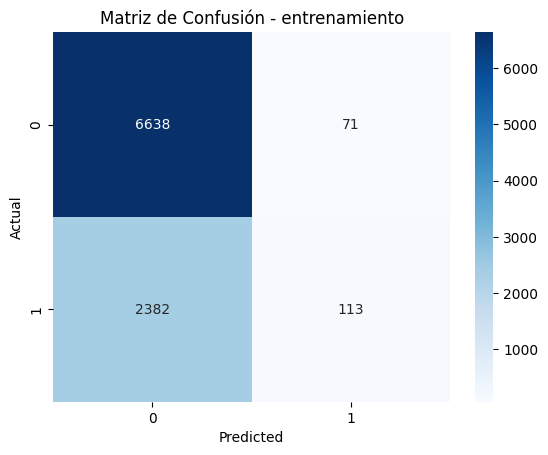

Resultados para el conjunto validación:
Matriz de confusión:
[[1657   21]
 [ 600   25]]
Accuracy: 0.7304
Tasa de Verdaderos Positivos (TPR): 0.0400
Tasa de Verdaderos Negativos (TNR): 0.9875
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1678
           1       0.54      0.04      0.07       625

    accuracy                           0.73      2303
   macro avg       0.64      0.51      0.46      2303
weighted avg       0.68      0.73      0.63      2303





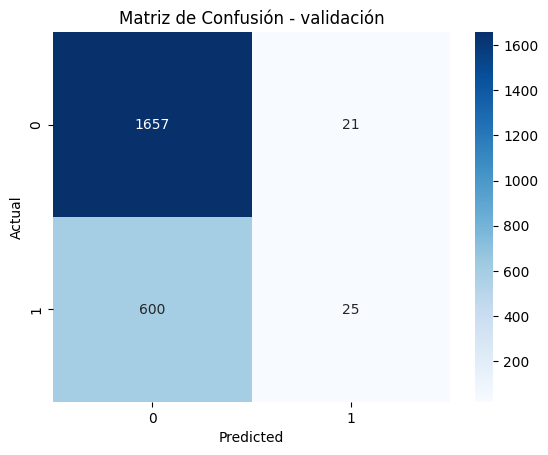

Resultados para el conjunto prueba:
Matriz de confusión:
[[2072   25]
 [ 752   29]]
Accuracy: 0.7300
Tasa de Verdaderos Positivos (TPR): 0.0371
Tasa de Verdaderos Negativos (TNR): 0.9881
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.54      0.04      0.07       781

    accuracy                           0.73      2878
   macro avg       0.64      0.51      0.46      2878
weighted avg       0.68      0.73      0.63      2878





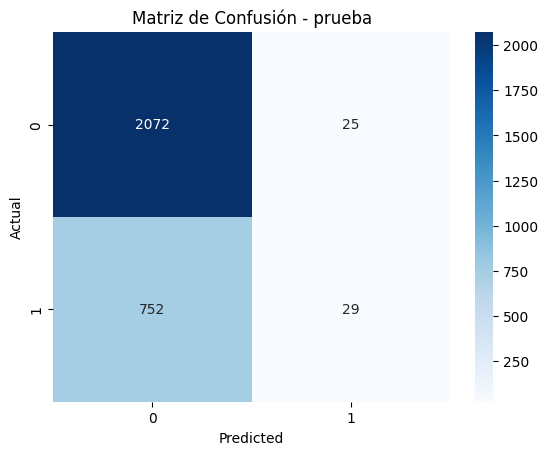

In [22]:
model_base = LogisticRegression(random_state=42)
model_base.fit(X_train, y_train)

print("Resultados del Modelo Base:")
evaluate_model(model_base, X_train, y_train, "entrenamiento")
evaluate_model(model_base, X_val, y_val, "validación")
evaluate_model(model_base, X_test, y_test, "prueba")

## **Curvas ROC para el modelo base**

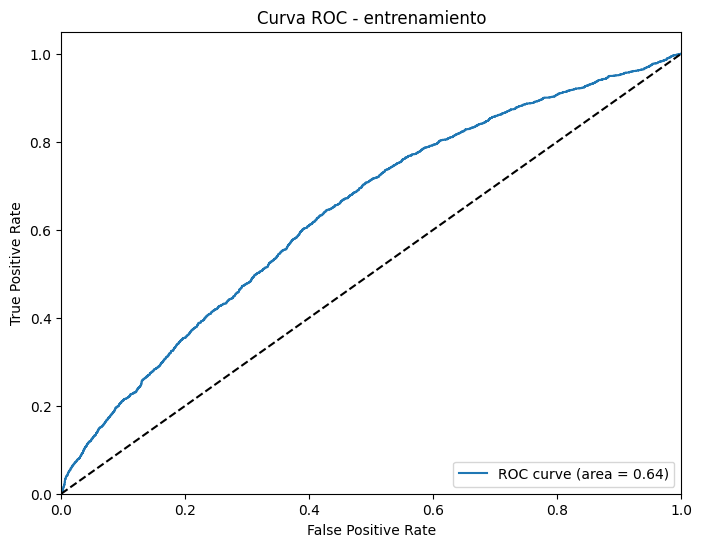

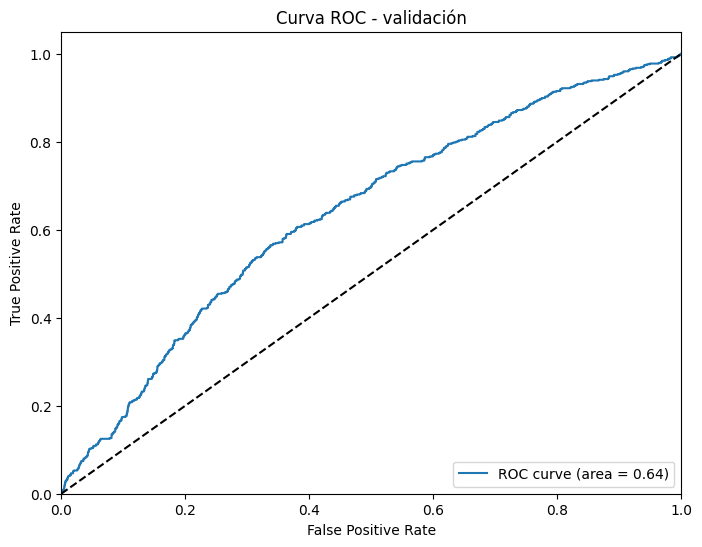

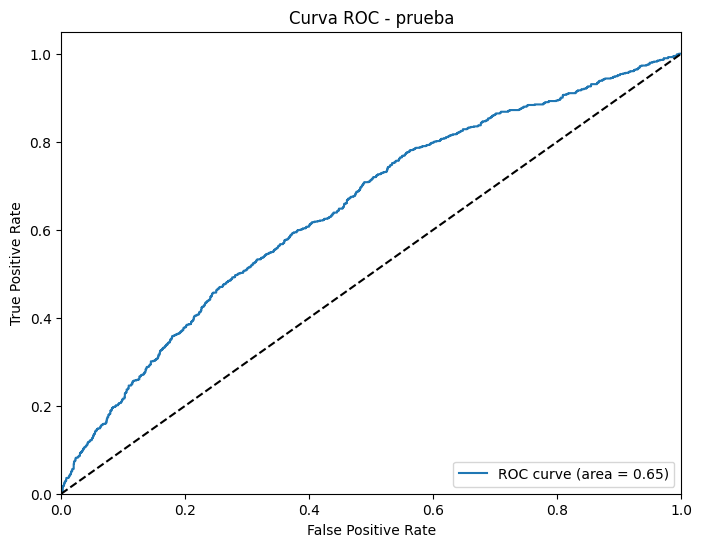

In [33]:
def plot_roc_curve(model, X, y, set_name):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {set_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(model_base, X_train, y_train, "entrenamiento")
plot_roc_curve(model_base, X_val, y_val, "validación")
plot_roc_curve(model_base, X_test, y_test, "prueba")

## **Prueba 2 - Modelo con características más representativas**

Características seleccionadas:
['chou_fasman', 'emini', 'isoelectric_point', 'aromaticity', 'hydrophobicity']

Resultados del Modelo con Características Seleccionadas:
Resultados para el conjunto entrenamiento:
Matriz de confusión:
[[6672   37]
 [2443   52]]
Accuracy: 0.7306
Tasa de Verdaderos Positivos (TPR): 0.0208
Tasa de Verdaderos Negativos (TNR): 0.9945
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      6709
           1       0.58      0.02      0.04      2495

    accuracy                           0.73      9204
   macro avg       0.66      0.51      0.44      9204
weighted avg       0.69      0.73      0.63      9204





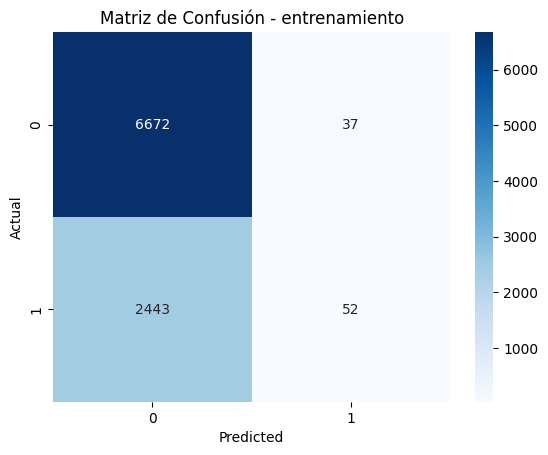

Resultados para el conjunto validación:
Matriz de confusión:
[[1671    7]
 [ 613   12]]
Accuracy: 0.7308
Tasa de Verdaderos Positivos (TPR): 0.0192
Tasa de Verdaderos Negativos (TNR): 0.9958
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1678
           1       0.63      0.02      0.04       625

    accuracy                           0.73      2303
   macro avg       0.68      0.51      0.44      2303
weighted avg       0.70      0.73      0.62      2303





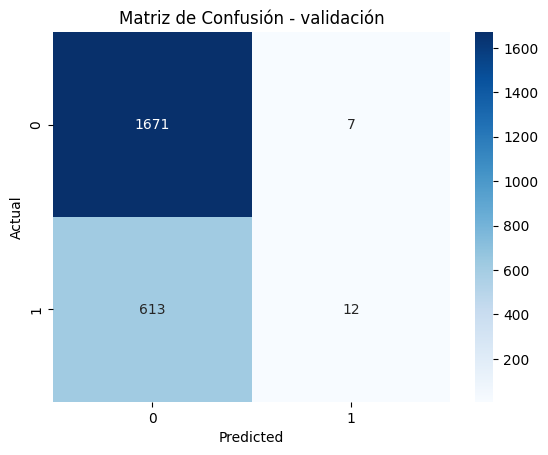

Resultados para el conjunto prueba:
Matriz de confusión:
[[2090    7]
 [ 764   17]]
Accuracy: 0.7321
Tasa de Verdaderos Positivos (TPR): 0.0218
Tasa de Verdaderos Negativos (TNR): 0.9967
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2097
           1       0.71      0.02      0.04       781

    accuracy                           0.73      2878
   macro avg       0.72      0.51      0.44      2878
weighted avg       0.73      0.73      0.63      2878





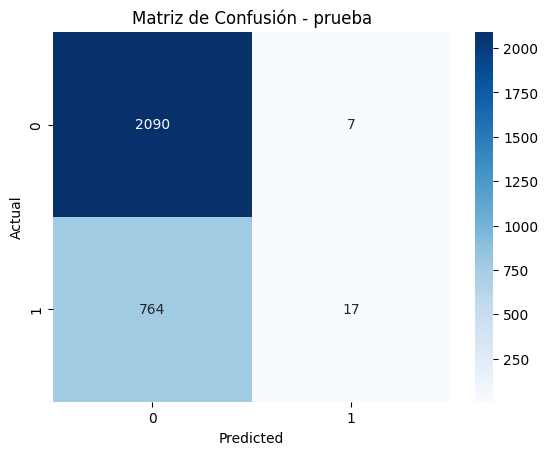

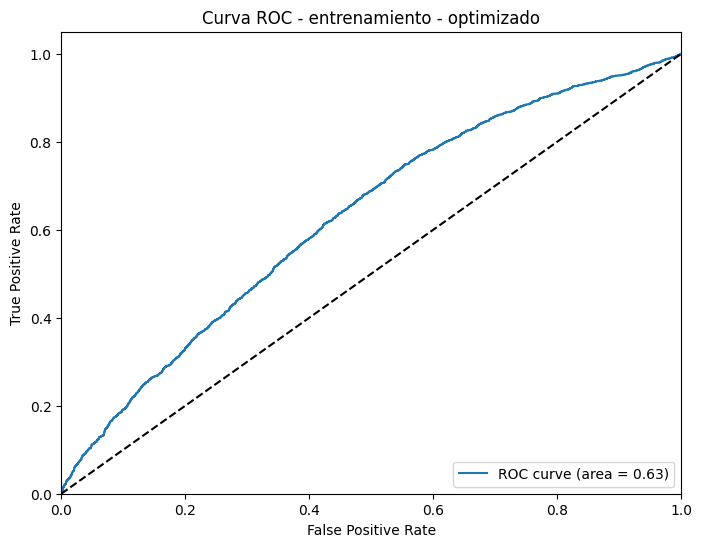

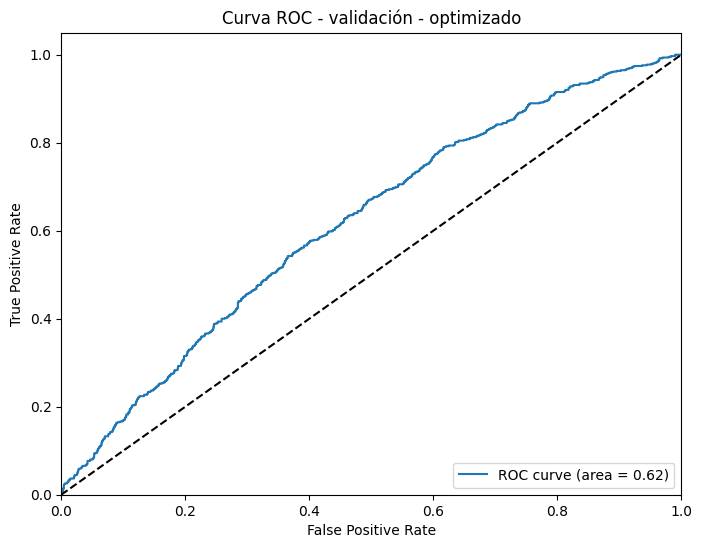

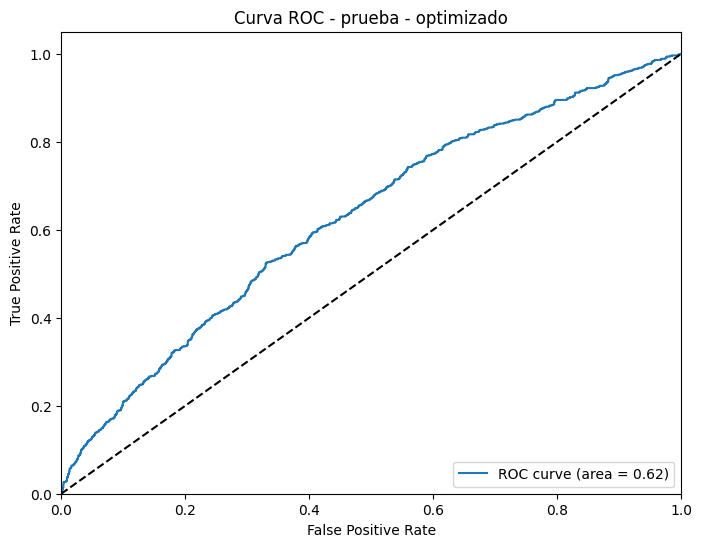


Comparación de Acuracia:
Modelo Base: 0.7300
Modelo Optimizado: 0.7321


In [34]:
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()].tolist()

print("Características seleccionadas:")
print(selected_features)

X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

model_selected = LogisticRegression(random_state=42)
model_selected.fit(X_train_selected, y_train)

print("\nResultados del Modelo con Características Seleccionadas:")
evaluate_model(model_selected, X_train_selected, y_train, "entrenamiento")
evaluate_model(model_selected, X_val_selected, y_val, "validación")
evaluate_model(model_selected, X_test_selected, y_test, "prueba")

# Curvas ROC para el modelo optimizado
plot_roc_curve(model_selected, X_train_selected, y_train, "entrenamiento - optimizado")
plot_roc_curve(model_selected, X_val_selected, y_val, "validación - optimizado")
plot_roc_curve(model_selected, X_test_selected, y_test, "prueba - optimizado")

# Comparación de la exactitud entre los modelos
accuracy_base = accuracy_score(y_test, model_base.predict(X_test))
accuracy_optimized = accuracy_score(y_test, model_selected.predict(X_test_selected))  # Cambiar X_test por X_test_selected
print(f"\nComparación de Acuracia:")
print(f"Modelo Base: {accuracy_base:.4f}")
print(f"Modelo Optimizado: {accuracy_optimized:.4f}")

## **Histogramas de errores de predicción**

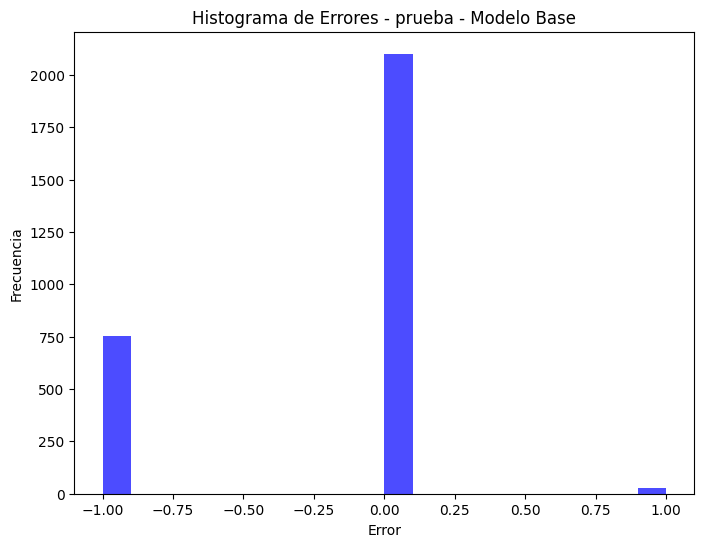

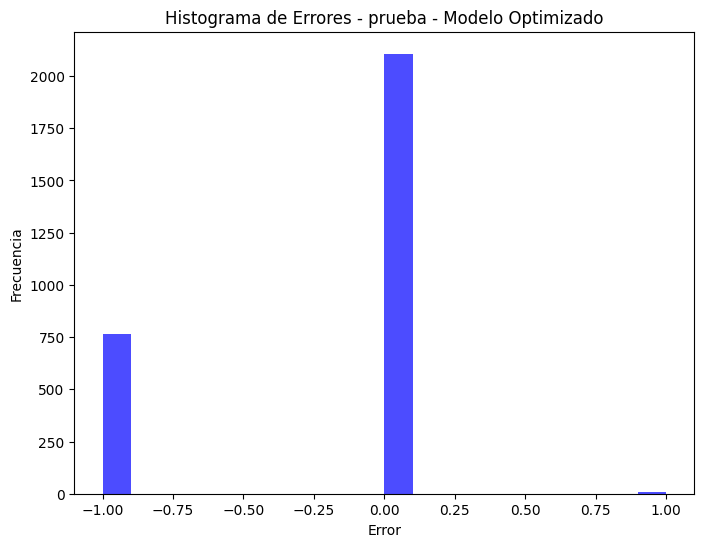

In [35]:
def plot_error_histogram(y_true, y_pred, set_name):
    errors = y_pred - y_true
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de Errores - {set_name}')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.show()

# Para el modelo base, usa X_test
plot_error_histogram(y_test, model_base.predict(X_test), "prueba - Modelo Base")
# Para el modelo optimizado, usa X_test_selected
plot_error_histogram(y_test, model_selected.predict(X_test_selected), "prueba - Modelo Optimizado")


## **Visualización de la importancia de las características**

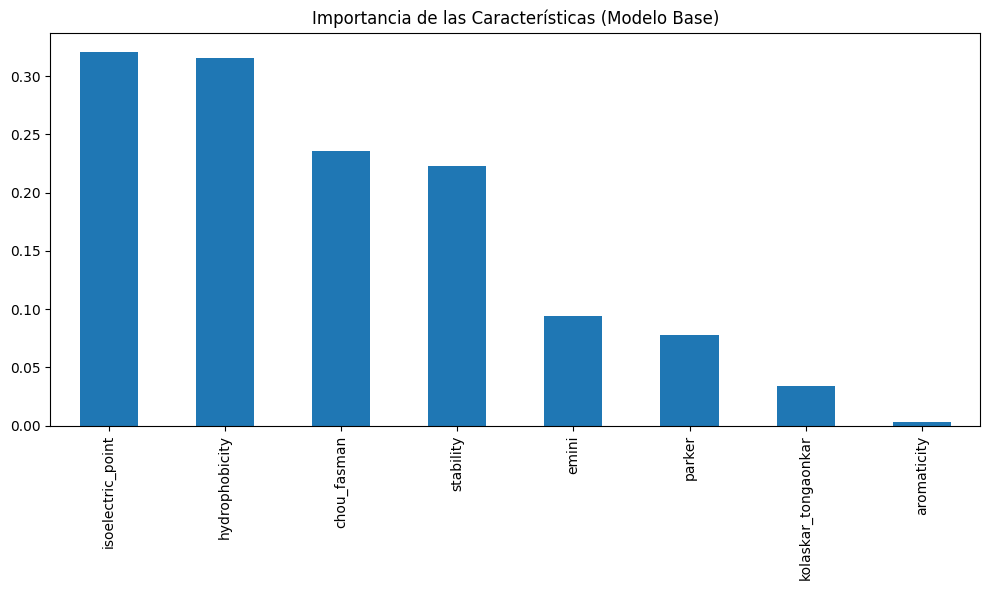

In [36]:
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(abs(model_base.coef_[0]), index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de las Características (Modelo Base)')
plt.tight_layout()
plt.show()

## **Gráfico de barras para comparar la acuracia de los modelos**

<ipython-input-40-3e270da3179e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Accuracy', data=df_accuracy, palette='coolwarm')


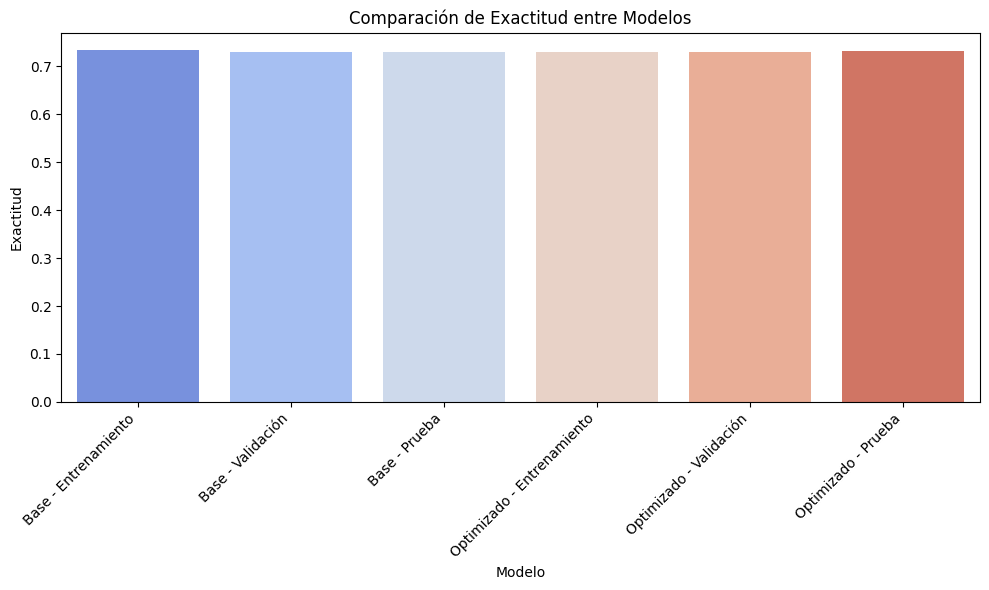

In [40]:
# Crear un diccionario con los datos de la exactitud
accuracy_data = {
    'Modelo': ['Base - Entrenamiento', 'Base - Validación', 'Base - Prueba',
               'Optimizado - Entrenamiento', 'Optimizado - Validación', 'Optimizado - Prueba'],
    'Accuracy': [accuracy_score(y_train, model_base.predict(X_train)),
                 accuracy_score(y_val, model_base.predict(X_val)),
                 accuracy_score(y_test, model_base.predict(X_test)),
                 accuracy_score(y_train, model_selected.predict(X_train_selected)),
                 accuracy_score(y_val, model_selected.predict(X_val_selected)),
                 accuracy_score(y_test, model_selected.predict(X_test_selected))]
}

# Crear un DataFrame con los datos
df_accuracy = pd.DataFrame(accuracy_data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy', data=df_accuracy, palette='coolwarm')
plt.title('Comparación de Exactitud entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Exactitud')
+plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

## **Gráfico de la frontera de decisión (Decision Boundary)**

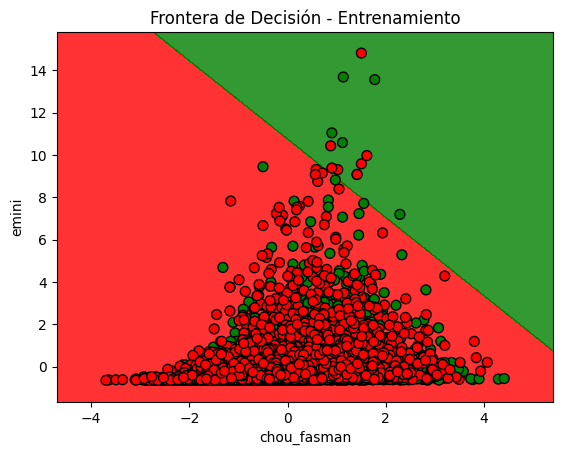

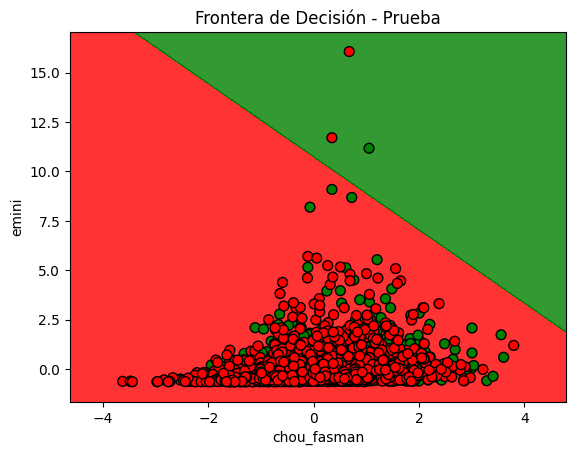

In [41]:
# Selección de dos características importantes para visualización
feature_1 = 'chou_fasman'
feature_2 = 'emini'

# Preparar datos para visualización
X_train_2d = train_data[[feature_1, feature_2]]
y_train_2d = train_data['target']
X_test_2d = test_data[[feature_1, feature_2]]
y_test_2d = test_data['target']

# Normalización
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Entrenar modelo con dos características
log_reg_2d = LogisticRegression()
log_reg_2d.fit(X_train_2d_scaled, y_train_2d)

# Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=ListedColormap(('red', 'green')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.show()

# Frontera de decisión para el conjunto de entrenamiento
plot_decision_boundary(X_train_2d_scaled, y_train_2d, log_reg_2d, 'Frontera de Decisión - Entrenamiento')

# Frontera de decisión para el conjunto de prueba
plot_decision_boundary(X_test_2d_scaled, y_test_2d, log_reg_2d, 'Frontera de Decisión - Prueba')
